In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')
import random
from random import randint
import math

In [105]:
food_amount = 500
pacman_amount = 200
board_size = 1000
default_health = 50
pacmen = []
food = []
crot = 1
cloc = .0001
cbite = 1
turn_loss = 10
phi_prec = (80/255.)
alpha_prec = 10/255.
delta_prec = 10/255.
pacman_radius = 1
food_health = 100

In [106]:
class pacman:
    def __init__(self):
        #change dynamically
        self.x = random.uniform(49*board_size/100,51*board_size/100)
        self.y = random.uniform(49*board_size/100,51*board_size/100)
        #this is set so the prgression will be outward
        self.theta = randint(0,359)
        self.health = default_health
        self.active = 1
        #dna
        self.phi = randint(0,255)
        self.alpha = randint(0,255)
        self.delta = randint(0,255)
        
        self.phi_val = self.phi*phi_prec
        self.alpha_val = self.alpha*alpha_prec
        self.delta_val = self.delta*delta_prec
        #self.f = closest food
        #self.dist = closest food distance
    def __bool__(self):
        return True
    
    def __repr__(self):
        return "{pacman, x:"+str(self.x)+", y:"+str(self.y)+", theta:"+str(self.theta)+"}"
    
    def find_dist(self,f):
        return np.sqrt((self.x-f.x)**2 + (self.y-f.y)**2)
    
    def find_angle(self,f):
        dx = f.x - self.x
        dy = f.y - self.y
        arc = math.degrees(math.atan((dy/dx)))
        theta1 = 1
        if dx > 0:
            theta1 = 180 - arc
            #this used to be an if, but i think arctan returns a negative when a negative is inputted.
            #therefor the two would be equivalent
        else:
            if dy > 0:
                theta1 = np.absolute(arc)
                #this is absolute because the angle will be a negative
            else:
                theta1 = 360 - arc
        #theta1 is the angle the food is from the x axis
        #returned is the difference in the angles
        return np.absolute(theta1 - self.theta)
    
    def check_angle(self,f):#check if the food is in the range
        diff = (self.phi_val/2)#this creates virutal bounds
        f_angle = self.find_angle(f)
        if(f_angle < diff):
            return True
        return False
        
    def find_food(self):
        global food
        closest = False
        closest_dist = False
        for i in food:
            dist = self.find_dist(i)
            if((dist < closest_dist or not closest_dist) and (self.check_angle(i))):
                closest = i
                closest_dist = dist
            self.f = closest
            self.dist = closest_dist
        if(closest != False):
            return True
        return False
        
    def rotate_to_food(self):# returns (in radians!!!) the angle needed to get the food with genetic error
        #no cost to rotation
        dx =  self.f.x - self.x
        dy =  self.f.y - self.y
        arc = math.atan((dy/dx))
        error = random.uniform(self.alpha_val/-2., self.alpha_val/2.)
        new_theta = arc + error
        return new_theta 
        
    def get_food(self):
        theta = self.rotate_to_food() #warning this is in radians...
        #theta is not used... 
        
        error = random.uniform(self.delta_val/-2., self.delta_val/2.)
        new_dist = self.dist + (error*self.dist)
        #the error for distance is relative to the distance, ie the greater the dist the greater the error
        
        dx =  self.f.x - self.x
        dy =  self.f.y - self.y
        distx = new_dist*(dx/self.dist)#equivalent to cos, error is not associted with the angle yet
        disty = new_dist*(dy/self.dist)#equivalent to sin
        self.x += distx
        self.y += disty
        cost = cloc*new_dist
        self.health -= cost
        #cost of rotate
    
    def bite(self):
        to_food = self.find_dist(self.f)
        self.health -= cbite
        if(to_food < pacman_radius):#means the bite was sucessful
            self.health += food_health
            self.f.reset()
            
    
    def random_rotate(self):
        self.theta = randint(0,359)
        #self.health += randint(-2,1)
    
    def step(self):
        self.health -= turn_loss
        if(self.find_food()):
            self.get_food()
            self.bite()
        self.random_rotate()
    
    
    def get_genes(self):
        return[self.phi,self.alpha,self.delta]
    
    def set_genes(self,genes):
        self.phi = genes[0]
        self.alpha = genes[1]
        self.delta = genes[2]
        
    def to_bits(self):
        genes = self.get_genes()
        split_genes = []
        for i in genes:
            bin_str = format(i, '#010b')
            bin_str = bin_str[2:]
            split_genes.append([bin_str[:4],bin_str[4:]])
        return split_genes
    
    def reproduce(self,other):
        son1 = pacman()
        son2 = pacman()
        son1_genes = []
        son2_genes = []
        mybits = self.to_bits()
        otherbits = other.to_bits()
        for i,v in enumerate(mybits):
            son1_gene = v[0]+otherbits[i][1]
            son2_gene = otherbits[i][0]+v[1]
            son1_gene = int('0b'+son1_gene,base=2)
            son2_gene = int('0b'+son2_gene,base=2)
            son1_genes.append(son1_gene)
            son2_genes.append(son2_gene)
        son1.set_genes(son1_genes)
        son2.set_genes(son2_genes)
        return [son1,son2]
        
        
p = pacman()
p2 = pacman()
print(p.reproduce(p2))

[{pacman, x:508.0763115068204, y:493.5373346503181, theta:153}, {pacman, x:506.48870321492643, y:502.6541400844702, theta:5}]


In [107]:
class dot:
    def __init__(self):
        self.x = random.uniform(0, board_size)
        self.y = random.uniform(0, board_size)
        self.active = 1
    def __repr__(self):
        return "{dot, x:"+str(self.x)+", y:"+str(self.y)+"}"
    def reset(self):
        self.x = random.uniform(0, board_size)
        self.y = random.uniform(0, board_size)

In [108]:
def gen1():
    global pacmen
    pacmen = []
    for i in range(0,pacman_amount):
        p = pacman()
        pacmen.append(p)
    pacmen = np.array(pacmen)
    print(pacmen[0])
    return pacmen

def food1():
    global food
    food = []
    for i in range(0,food_amount):
        f = dot()
        food.append(f)
    food = np.array(food)
    return food

In [109]:
def driver(gen,life_span,generations):
    food = food1()
    dt = 1
    t = [0]
    tracker = []
    genetics = [[],[]]
    cycles = []
    
    global pacmen
    
    for g in range(0,generations): #iterates through each generation
        tracker.append([])
        genetics[0].append(pacmen[0].phi)
        genetics[1].append(pacmen[0].delta)
        for i in pacmen:
            tracker[g].append([])
            
        cycles.append([])
        t.append(t[-1]+dt)
        for q in range(0,life_span): #runs through time with current generation
            for i,v in enumerate(pacmen):
                tracker[g][i].append([v.x,v.y,v.theta])
                v.step()
            cycles[g].append([])# note cycles starts after the first gen
            cycles[g][q].append([])
            cycles[g][q].append([])
            cycles[g][q].append([])
            cycles[g][q].append([])
            for w in pacmen:
                cycles[g][q][0].append(w.x)
                cycles[g][q][1].append(w.y)
            for f in food:
                cycles[g][q][2].append(f.x)
                cycles[g][q][3].append(f.y)
                
        
        
        #makes the next generation
        sons = []
        healthy_pacmen = []
        pacmen_ranked = []
        avg_health = 0
        for i in pacmen:
            pacmen_ranked.append(i.health)
            avg_health += i.health
        
        avg_health = avg_health/len(pacmen)
        pacmen_ranked = np.array(sorted(pacmen_ranked))
        med_health = pacmen_ranked[0]
        print(med_health, avg_health)
        
        for i,v in enumerate(pacmen): #end of a generation mean reproduce
                if(v.health > med_health):
                    healthy_pacmen.append(v)
        #this system kills off the bottom 5 pacmen
        
        for i,v in enumerate(healthy_pacmen):
            if( i % 2 == 1):
                temp = v.reproduce(healthy_pacmen[randint(0,len(healthy_pacmen)-1)])
                sons.extend(temp)
                
        #print('generation over')
        pacmen = sons
        
    return t,tracker,genetics,cycles

In [110]:
t,tracker,genetics,cycles = driver(gen1(),10,10)#turns then generations

{pacman, x:502.71376757238465, y:501.8013893164327, theta:301}
-60.1869229983 -38.5938350973
-60.2564452722 -25.6612920084
-60.2270602545 -38.2843623328
-60.2122967493 -35.5255623217
-60.2728515009 -42.9337620262
-60.2191512122 -36.9181513998
-60.1770792344 -32.7620860607
-60.3744601403 -32.0935787728
-60.3530149228 -29.6655766354
-60.2044276853 -38.2839849992


[[190, 104, 243, 215, 8, 255, 184, 126, 52, 231], [105, 27, 247, 74, 216, 240, 29, 100, 155, 147]]


<IPython.core.display.Javascript object>


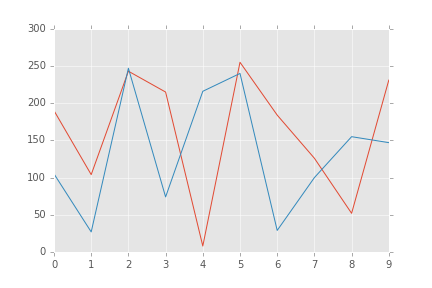

In [111]:
print(genetics)
plt.figure()
plt.plot(genetics[0])
plt.plot(genetics[1])

<IPython.core.display.Javascript object>


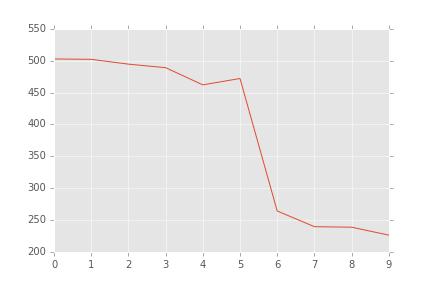

<IPython.core.display.Javascript object>


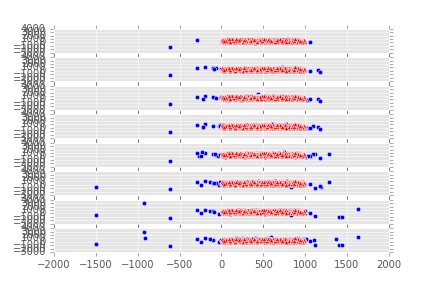

In [112]:
tracker = np.array(tracker)
x = []
for i in tracker[0][0]:
    x.append(i[0])
plt.figure()
plt.plot(x)

figs = 8
gen = 0
f, axarr = plt.subplots(figs, sharex=True,sharey=True)
for i in range(0,figs):
    axarr[i].scatter(cycles[gen][i][0],cycles[gen][i][1])
    axarr[i].scatter(cycles[gen][i][2],cycles[gen][i][3], marker='^',c='red')
    
